**DEPUIS GOOGLE COLAB UNIQUEMENT**

In [ ]:
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
project_id = 'le-wagon-337814'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
! pip install --quiet git+https://github.com/christophelanson/icangetyoursmile

**---------------------------------------------------------------------------------------------------**

**EN LOCAL LANCER LES CELLULES A PARTIR D'ICI**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

2022-03-08 14:19:06.434316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 14:19:06.434418: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from icangetyoursmile.utils import get_dataset_tts_from_gcp, get_dataset_tts_from_local
from icangetyoursmile.models import unet

**MODEL PARAMETERS**

In [4]:
data_source_is_gcp = True
model_name='U-net-colab-test'
sample_size = 30
image_size = (64,64)
unet_power = 3
epochs = 50
batch_size = 8
test_split = 0.2
random_seed = 1
path_to_data = '/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data' # if local, not used if cgp

**GET DATA**

In [5]:
if data_source_is_gcp == True:
    #data from gcp
    X_train, y_train, X_test, y_test, X_visu, y_visu = get_dataset_tts_from_gcp(sample_size=sample_size,
                                                                                image_size=image_size,
                                                                                random_seed=random_seed,
                                                                                test_split=test_split)
else:
    #data from local
    X_train, y_train, X_test, y_test, X_visu, y_visu = get_dataset_tts_from_local(path_to_data=path_to_data,
                                                                                  sample_size=sample_size,
                                                                                  image_size=image_size,
                                                                                  random_seed=random_seed,
                                                                                  test_split=test_split)

Connecting to gcp..
loading data  2201
loading data  9325
loading data  1033
loading data  4179
loading data  1931
loading data  8117
loading data  7364
loading data  7737
loading data  6219
loading data  3439
loading data  1537
loading data  7993
loading data  0464
loading data  6386
loading data  7090
loading data  9952
loading data  0034
loading data  7297
loading data  4363
loading data  3748
loading data  9685
loading data  1674
loading data  5200
loading data  0501
loading data  0365
loading data  0416
loading data  8870
loading data  0150
loading data  6245
loading data  3548
loading data  0150
loading data  0365
loading data  0416
loading data  3548
loading data  8870
Done
X shape : (24, 64, 64, 3)
y shape : (24, 64, 64, 3)
X_test shape : (6, 64, 64, 3)
y_test shape : (6, 64, 64, 3)
X_visu shape : (5, 64, 64, 3)
y_visu shape : (5, 64, 64, 3)


**INSTANTIATE MODEL and CALLBACKS**

In [6]:
input_size = (image_size[0], image_size[1],3)
model = unet(input_size=input_size)

2022-03-08 14:20:50.191345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-08 14:20:50.191523: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-08 14:20:50.191581: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-08 14:20:50.192307: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# callback to save model training on 5 images
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_visu, image_log)

In [8]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience= 500, restore_best_weights=True)

**RELOAD MODEL FROM EXISTING ?**

In [9]:
# model must be saved locally ./saved_models/model_name
from icangetyoursmile.utils import loading_model
model = loading_model(model_name)

**FIT and SAVE (run again to refit from data)**

In [10]:
from icangetyoursmile.utils import save_model
from icangetyoursmile.trainer import upload_model_to_gcp

In [13]:
# Run this cell again to fit from previous parameters
results = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size,
                    epochs=epochs, use_multiprocessing=True, callbacks=[save_predict, early_stopping])
save_model(model, model_name)
upload_model_to_gcp(model_name, run_locally=False)

Epoch 1/50
3/3 [==============================] - 0s 171ms/step - loss: 705.4332 - val_loss: 564.6419
Epoch 2/50
3/3 [==============================] - 0s 142ms/step - loss: 697.7980 - val_loss: 567.9183
Epoch 3/50
3/3 [==============================] - 0s 156ms/step - loss: 684.7260 - val_loss: 548.5966
Epoch 4/50
3/3 [==============================] - 0s 140ms/step - loss: 684.4120 - val_loss: 551.2952
Epoch 5/50
3/3 [==============================] - 0s 137ms/step - loss: 686.9677 - val_loss: 559.6058
Epoch 6/50
3/3 [==============================] - 0s 122ms/step - loss: 674.7019 - val_loss: 535.2363
Epoch 7/50
3/3 [==============================] - 0s 124ms/step - loss: 674.7128 - val_loss: 542.6535
Epoch 8/50
3/3 [==============================] - 0s 126ms/step - loss: 666.7377 - val_loss: 541.6570
Epoch 9/50
3/3 [==============================] - 0s 131ms/step - loss: 660.8874 - val_loss: 525.1723
Epoch 10/50
3/3 [==============================] - 0s 113ms/step - loss: 666.7703 

Epoch 42/50
3/3 [==============================] - 0s 96ms/step - loss: 552.4932 - val_loss: 463.0165
Epoch 43/50
3/3 [==============================] - 0s 98ms/step - loss: 542.5893 - val_loss: 446.9617
Epoch 44/50
3/3 [==============================] - 0s 97ms/step - loss: 543.8381 - val_loss: 451.5185
Epoch 45/50
3/3 [==============================] - 0s 98ms/step - loss: 538.4376 - val_loss: 443.2716
Epoch 46/50
3/3 [==============================] - 0s 107ms/step - loss: 543.0457 - val_loss: 442.1847
Epoch 47/50
3/3 [==============================] - 0s 94ms/step - loss: 531.8397 - val_loss: 445.3986
Epoch 48/50
3/3 [==============================] - 0s 96ms/step - loss: 533.3608 - val_loss: 437.7354
Epoch 49/50
3/3 [==============================] - 0s 99ms/step - loss: 526.9525 - val_loss: 437.7018
Epoch 50/50
3/3 [==============================] - 0s 99ms/step - loss: 527.4442 - val_loss: 436.7607
INFO:tensorflow:Assets written to: ./saved_models/U-net-colab-test/assets
looking

**PREDICT X_visu**

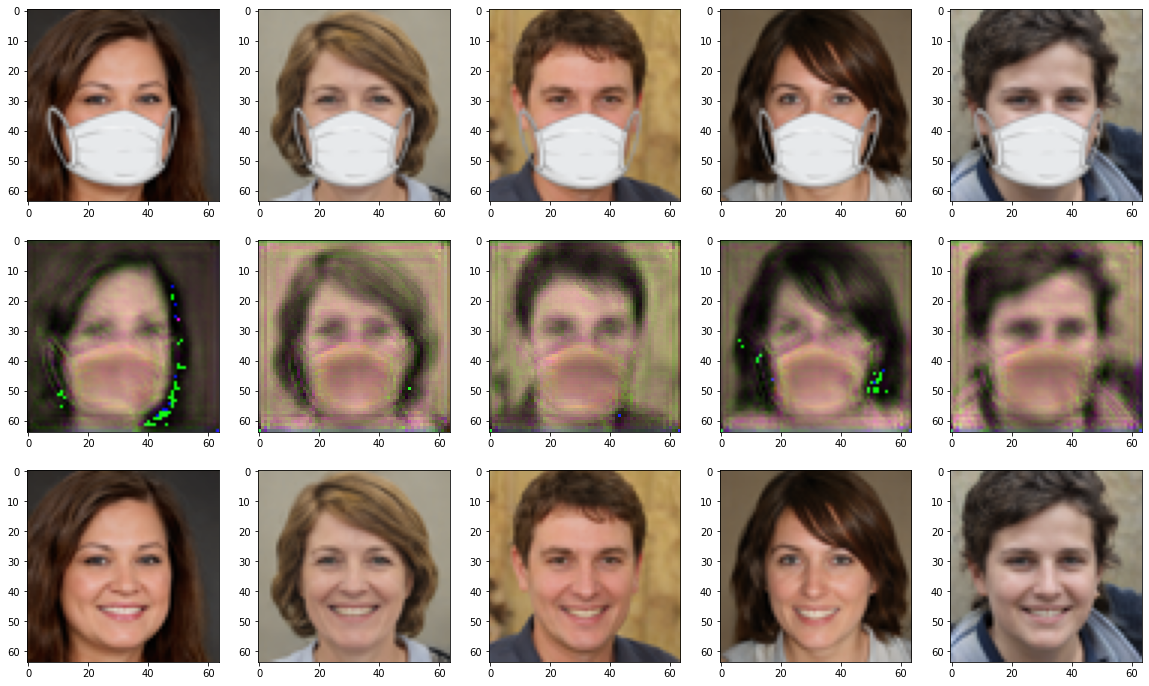

In [14]:
from icangetyoursmile.utils import plot_results
y_pred = model.predict(X_visu).astype(np.uint8)
plot_results(X_visu, y_pred, y_visu)